# Графики и подсчет времени для постера

In [1]:
!pwd
!date
!ls

/home/sphere/SIT/Analysis/Baselines
Вт фев 18 18:25:05 MSK 2020
Alldata.dat			Collect_baselines_data.ipynb  sit_current.png
baselines.csv			Draw_maxevents.ipynb	      sit_tmos.png
baselines_data_to_poster.ipynb	Parser.dat		      tele.csv
Baselines.ipynb			Parser.ipynb		      Telemetry.ipynb
Baselines.txt			__pycache__		      Untitled.ipynb
Baselines.txt.ipynb		retina.py


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 2
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.max_open_warning'] = 129

In [7]:
''' Чтение пьедесталов: baselines'''
filename = "baselines.csv"
data = pd.read_csv(filename)
print(data.shape)
data.head(2)

(564338, 141)


,Unnamed: 0,event,syncro,tmicro,timesec,date,time,cur,summ,Ianode,...,119,120,121,122,123,124,125,126,127,128
0,0,57118,-1,13:02:33.672,1569153909,2019-09-22,12:05:09,104,11149.63,1.017,...,203.71,200.85,206.43,201.49,199.82,200.80,200.00,200.01,199.96,200.0
1,1,57120,-1,13:03:31.673,1569153910,2019-09-22,12:05:10,104,16085.05,1.017,...,204.50,201.63,205.30,201.21,199.92,200.54,200.01,200.00,199.91,200.0


In [8]:
data[data.date == "2020-01-15"].head(2)

,Unnamed: 0,event,syncro,tmicro,timesec,date,time,cur,summ,Ianode,...,119,120,121,122,123,124,125,126,127,128
366110,366110,548074,-1,19:48:41.095,1579088921,2020-01-15,11:48:41,72,11509.42,0.0,...,204.89,199.61,206.25,199.63,201.05,202.00,200.86,200.92,201.11,201.87
366111,366111,548075,-1,19:49:09.088,1579088949,2020-01-15,11:49:09,72,8804.96,0.0,...,208.28,201.70,207.16,201.91,201.09,202.01,200.83,200.89,201.11,201.98


# Графики

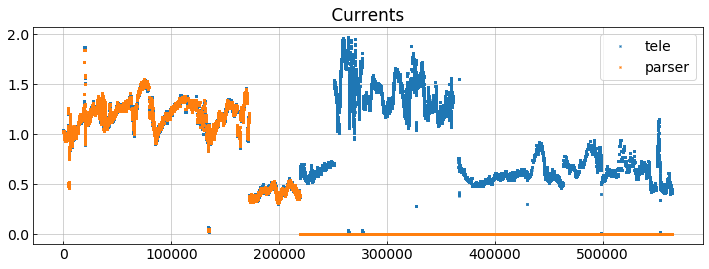

In [18]:
""" Currents """
#x = data.cur[data.cur < 1000]
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(0.01 * data.cur[data.cur < 1000].values, 'x', label = "tele")
plt.plot(data.Ianode.values, 'x', label = "parser")
plt.title(" Currents ")
plt.legend()
plt.grid()

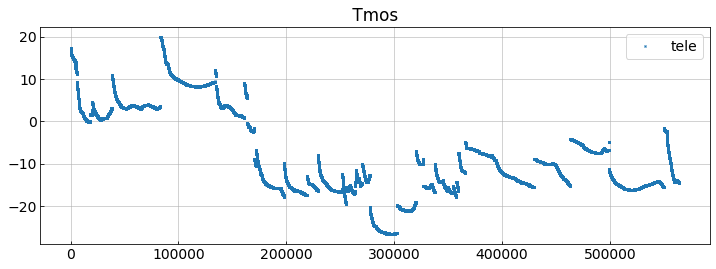

In [10]:
""" Tmos """
#x = data.cur[data.cur < 1000]
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(data.Tmos[data.cur < 1000].values, 'x', label = "tele")
plt.title(" Tmos ")
plt.legend()
plt.grid()

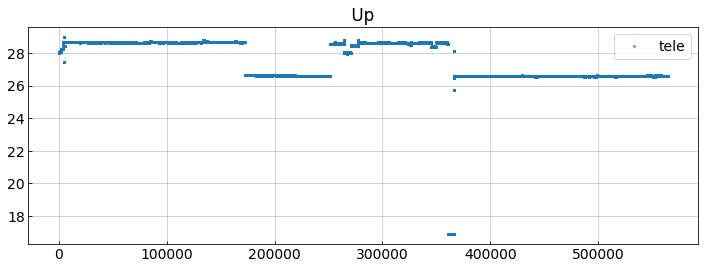

In [11]:
""" Up """
#x = data.cur[data.cur < 1000]
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(data.Up[data.cur < 1000].values, 'x', label = "tele")
plt.title(" Up ")
plt.legend()
plt.grid()

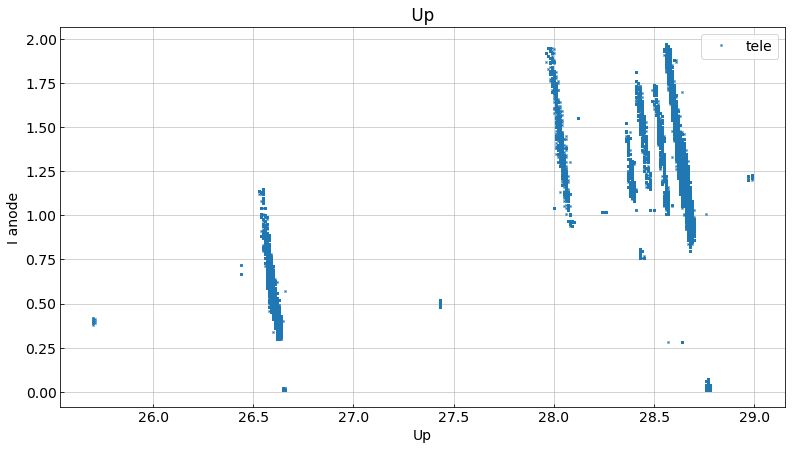

In [12]:
""" Imos vs Up """
plt.rcParams['figure.figsize'] = (13,7)
x = data.Up[ (data.cur > 0) & (data.cur < 1000) & (data.Up > 24)].values
y = data.cur[(data.cur > 0) & (data.cur < 1000) & (data.Up > 24)].values * 0.01
plt.plot(x, y, 'x', label = "tele")
plt.xlabel("Up")
plt.ylabel("I anode")
plt.title(" Up ")
plt.legend()
plt.grid()

In [13]:
from matplotlib import dates
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

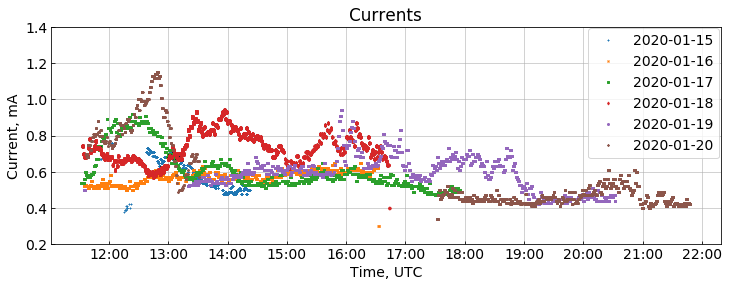

In [14]:
''' Токи по ночам '''
fmt = dates.DateFormatter('%H:%M')
plcol = ['+','x', 's', 'd', 'o', '*']
#plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
#plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']
minev = 548075 # 540159

i = 0
fig, ax = plt.subplots(figsize=(12,4))
for key, grp in data[(data.cur < 1000) & (data.cur > 10) & (data.event > minev)].groupby(['date']):
    #print(key)
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in grp.time]
    y = grp.cur
    #ax.plot(x, y, plcol[i], label=key)
    ax.plot(x, y/100, plcol[i], label=key)
    i += 1

ax.xaxis.set_major_formatter(fmt)
ax.set_title('Currents')
plt.xlabel("Time, UTC")
plt.ylabel("Current, mA")
plt.ylim(0.200, 1.400)
plt.legend(borderaxespad=0.1)
plt.grid()
plt.savefig("sit_current.png", dpi=300,  bbox_inches='tight')

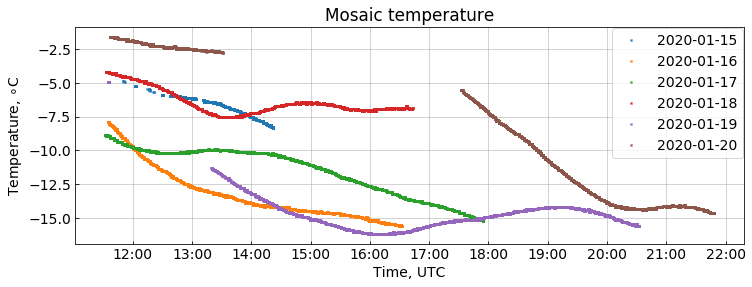

In [15]:
''' Температуры по ночам '''
fmt = dates.DateFormatter('%H:%M')
plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
minev = 548075 # 540159
fig, ax = plt.subplots(figsize=(12,4))

for key, grp in data[(data.cur < 1000) & (data.cur > 10) & (data.event > minev)].groupby(['date']):
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in grp.time]
    y = grp.Tmos
    ax.plot(x, y, "x", label=key)

ax.xaxis.set_major_formatter(fmt)
ax.set_title('Mosaic temperature')
plt.xlabel("Time, UTC")
plt.ylabel("Temperature, $\circ$C")

plt.legend(borderaxespad=0.1)
plt.grid()
plt.savefig("sit_tmos.png", dpi=300,  bbox_inches='tight')

# Подсчет времени работы установки

In [16]:
total = 0
for key, grp in data.groupby(['date']):
    delta = grp.timesec.max() - grp.timesec.min()
    total += delta
    print(key, grp.timesec.min(), grp.timesec.max(), " dt=", int(10*delta/3600)/10, " h\t",int(10*total/3600)/10)

2019-09-22 1569153909 1569162590  dt= 2.4  h	 2.4
2019-09-23 1569250763 1569256194  dt= 1.5  h	 3.9
2019-10-24 1571918609 1571944440  dt= 7.1  h	 11.0
2019-10-26 1572116039 1572123525  dt= 2.0  h	 13.1
2019-10-27 1572177808 1572212995  dt= 9.7  h	 22.9
2019-10-28 1572264211 1572299400  dt= 9.7  h	 32.7
2019-10-29 1572351911 1572382097  dt= 8.3  h	 41.1
2019-10-30 1572437864 1572444624  dt= 1.8  h	 42.9
2019-10-31 1572522989 1572559259  dt= 10.0  h	 53.0
2019-11-01 1572612089 1572621869  dt= 2.7  h	 55.7
2019-11-04 1572885732 1572905278  dt= 5.4  h	 61.2
2019-11-19 1574170200 1574177640  dt= 2.0  h	 63.2
2019-11-26 1574767124 1574808295  dt= 11.4  h	 74.7
2019-11-27 1574855682 1574894812  dt= 10.8  h	 85.5
2019-12-17 1576583802 1576593778  dt= 2.7  h	 88.3
2019-12-18 1576667031 1576685040  dt= 5.0  h	 93.3
2019-12-20 1576863954 1576867499  dt= 0.9  h	 94.3
2019-12-24 1577207295 1577229231  dt= 6.0  h	 100.4
2019-12-25 1577279237 1577315664  dt= 10.1  h	 110.5
2019-12-26 1577363482 15773

In [22]:
print("%d sec\t %.2f h" % (total, total/3600))

789446 sec	 219.29 h


# THE END